In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
# Define the input shape
input_img_de = Input(shape=(28, 28))  # Changed input shape to (28, 28)

# Add a Flatten layer to reshape the input
flattened_input_de = Flatten()(input_img_de) # Flatten the input

# Encoder layers
encoded1_de = Dense(512, activation='relu')(flattened_input_de) # Connect to flattened input
encoded2_de = Dense(128, activation='relu')(encoded1_de)
encoded3_de = Dense(32, activation='relu')(encoded2_de)

# Decoder layers
decoded1_de = Dense(32, activation='relu')(encoded3_de)
decoded2_de = Dense(128, activation='relu')(decoded1_de)
decoded3_de = Dense(784, activation='sigmoid')(decoded2_de)

In [6]:
# Reshape the output to (28, 28)
reshaped_output_de = keras.layers.Reshape((28, 28))(decoded3_de)

# Define the autoencoder model
autoencoder_de = Model(input_img_de, reshaped_output_de)

# Define the encoder model
autoencoder_de.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
# Reshape x_train and x_test before fitting
x_train_reshaped_de = x_train_noisy.reshape(-1, 28, 28) # Reshape x_train
x_test_reshaped_de = x_test_noisy.reshape(-1, 28, 28)  # Reshape x_test


# Fit Auto Encoder
autoencoder_de.fit(x_train_reshaped_de, x_train_reshaped_de, epochs=20, batch_size=32, shuffle=True, validation_data=(x_test_reshaped_de, x_test_reshaped_de))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.4545 - val_loss: 0.4204
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.4189 - val_loss: 0.4142
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.4141 - val_loss: 0.4121
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4120 - val_loss: 0.4108
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.4108 - val_loss: 0.4099
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4098 - val_loss: 0.4093
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.4093 - val_loss: 0.4089
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4086 - val_loss: 0.4085
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4083 - val_loss: 0.4080
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.4078 - val_loss: 0.4078
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4074 - val_loss: 0.4074
Epoch 12/20
1875/18

In [8]:
# show output of autoencoder
decoded_imgs_de = autoencoder_de.predict(x_test_reshaped_de)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


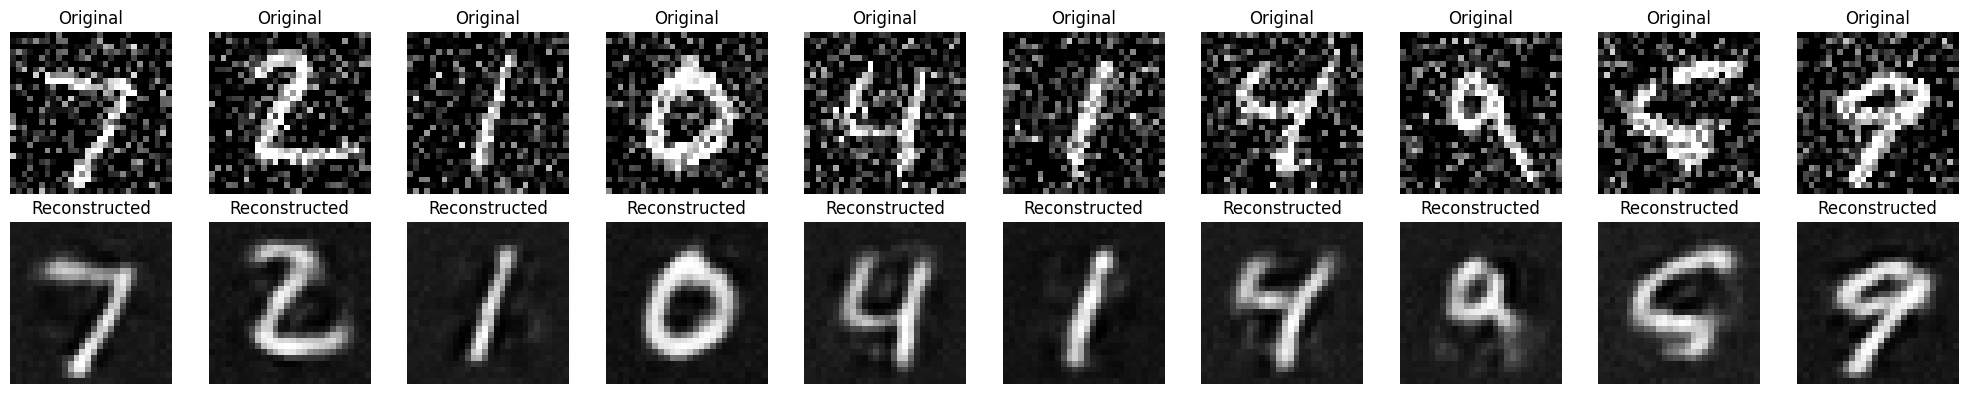

In [9]:
import matplotlib.pyplot as plt

# Plotting the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_reshaped_de[i].reshape(28, 28))  # Adjust dimensions if needed
    plt.gray()
    ax.set_title("Original")
    ax.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_de[i].reshape(28, 28))  # Adjust dimensions if needed
    plt.gray()
    ax.set_title("Reconstructed")
    ax.axis('off')

plt.tight_layout()
plt.show()